<h1>Titanic - Machine Learning from Disaster <h1>

Importing libraries:

In [90]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import sys
import xgboost as xgb
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
DROPOUT = 0.2
EPOCHS = 10


<h2>Data preprocessing and cleaning<h2>

Loading data and looking into it

In [135]:

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


print("Train data:")
display(train_data.head(10))

print("Test data:")
display(test_data.head(10))

display(train_data.head(20))


Train data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Test data:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


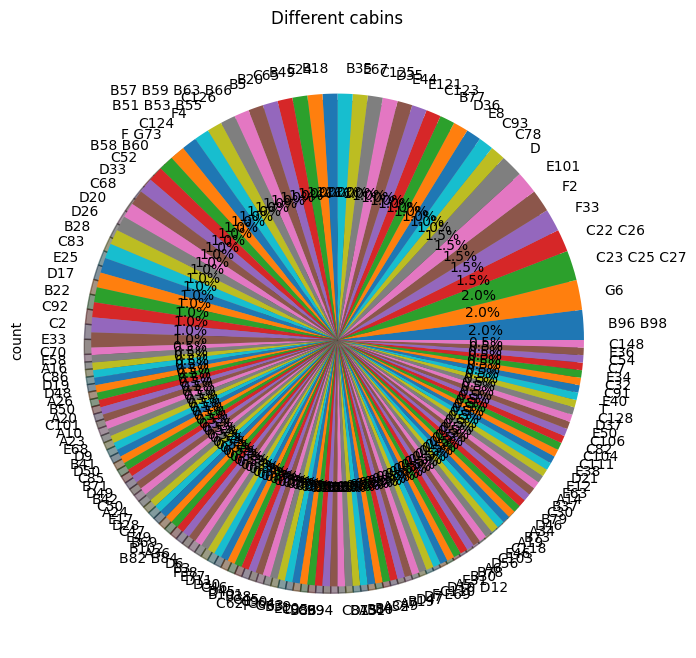

In [93]:
fig, ax = plt.subplots(figsize=(8, 8))
train_data["Cabin"].value_counts().plot.pie(autopct='%1.1f%%', ax=ax, shadow=True)
plt.title("Different cabins")
plt.show()

In [102]:
display(
len(train_data['Ticket']),
len(train_data['Cabin']),

len(train_data['Ticket'].unique()),
len(train_data['Cabin'].unique()),
)

train_data.head()

891

891

681

148

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
train_data = pd.DataFrame(train_data)

cabins = train_data.groupby("Cabin")["Cabin"].count().sort_values(ascending=False)
tickets = train_data.groupby("Ticket")["Ticket"].count().sort_values(ascending=False)

usable_tickets = tickets[tickets > 1]
len(usable_tickets)

usable_cabins = cabins[cabins > 1]
len(usable_cabins)



train_data["Ticket"] = train_data["Ticket"].apply(lambda x: "other" if x not in usable_tickets else x)

train_data["Cabin"] = train_data["Cabin"].apply(lambda x: "other" if x not in usable_cabins else x)


test_data["Ticket"] = test_data["Ticket"].apply(lambda x: "other" if x not in usable_tickets else x)

test_data["Cabin"] = test_data["Cabin"].apply(lambda x: "other" if x not in usable_cabins else x)

train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,other,7.2500,other,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,other,71.2833,other,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,other,7.9250,other,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,other,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,other,8.0500,other,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,other,8.4583,other,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,other,51.8625,other,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,other,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,other,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,other,30.0708,other,C


array(['other', '349909', '347742', '347082', '382652', '347077', '19950',
       'SC/Paris 2123', '3101295', 'PC 17572', 'C.A. 34651', 'CA 2144',
       '347088', 'S.O.C. 14879', '1601', 'W./C. 6608', '371110', '230080',
       'CA. 2343', '363291', '4133', 'LINE', '35273', 'C.A. 31921',
       '110152', 'PC 17755', '110413', 'PC 17582', 'PC 17760', '13502',
       '239853', '113781', '17421', 'F.C.C. 13529', 'PC 17757', '113760',
       '29106', '345773', '2666', '248727', '24160'], dtype=object)

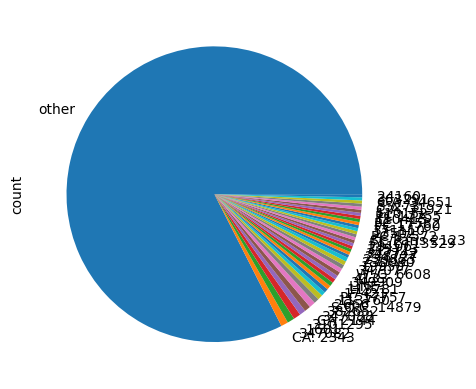

In [112]:

train_data["Ticket"].value_counts().plot(kind="pie")
train_data["Ticket"].unique()


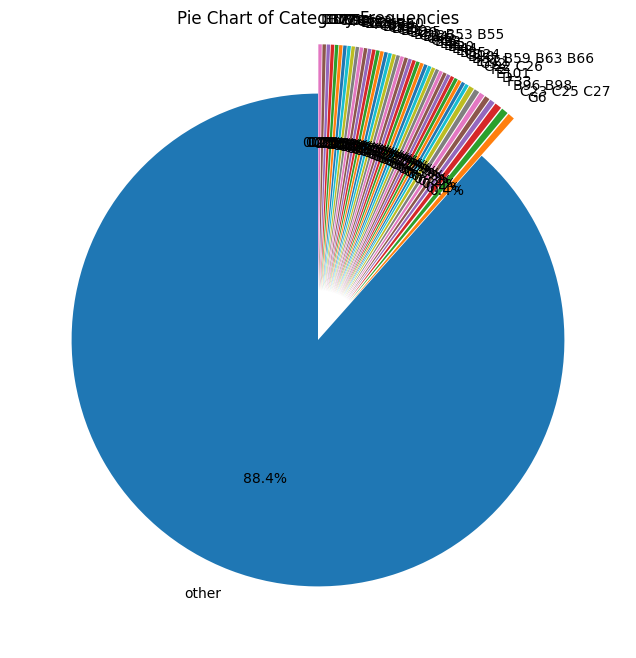

array(['other', 'C123', 'G6', 'C23 C25 C27', 'D33', 'C52', 'B28', 'C83',
       'F33', 'F G73', 'D26', 'B58 B60', 'E101', 'F2', 'C2', 'E33', 'F4',
       'D36', 'C93', 'C78', 'D35', 'B77', 'E67', 'C125', 'B49', 'D',
       'C22 C26', 'C65', 'B57 B59 B63 B66', 'B18', 'C124', 'B35',
       'B96 B98', 'E44', 'C92', 'D20', 'E25', 'B22', 'C68', 'C126',
       'B51 B53 B55', 'B5', 'B20', 'E24', 'E8', 'E121', 'D17'],
      dtype=object)

In [126]:
explode = np.zeros(len(['other', 'C123', 'G6', 'C23 C25 C27', 'D33', 'C52', 'B28', 'C83',
       'F33', 'F G73', 'D26', 'B58 B60', 'E101', 'F2', 'C2', 'E33', 'F4',
       'D36', 'C93', 'C78', 'D35', 'B77', 'E67', 'C125', 'B49', 'D',
       'C22 C26', 'C65', 'B57 B59 B63 B66', 'B18', 'C124', 'B35',
       'B96 B98', 'E44', 'C92', 'D20', 'E25', 'B22', 'C68', 'C126',
       'B51 B53 B55', 'B5', 'B20', 'E24', 'E8', 'E121', 'D17']))
explode[1:] = 0.2


plt.figure(figsize=(8, 8))
plt.pie(train_data["Cabin"].value_counts(), labels=train_data["Cabin"].value_counts().index, autopct='%1.1f%%', startangle=90, explode=explode, radius= 1)
plt.title('Pie Chart of Category Frequencies')
plt.show()

In [127]:
#PREPROCESSING DATA:
#1. dropping useless columns
train_x = train_data.drop(['Survived', 'Name',"PassengerId"], axis=1)

train_y = train_data["Survived"]

test_x = test_data.drop(['Name',"PassengerId",], axis=1)



In [115]:
#2. applying one-hot encoding

combined_trainTest = pd.concat([train_x, test_x])

#One-hot encoding some columns and leaving some out
to_hp = ['Sex', 'Pclass', 'Embarked','Ticket', 'Cabin']
to_not_hp = ['SibSp', 'Parch',"Age"]

combined_trainTest.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,22.0,1,0,other,7.2500,other,S
1,1,female,38.0,1,0,other,71.2833,other,C
2,3,female,26.0,0,0,other,7.9250,other,S
3,1,female,35.0,1,0,other,53.1000,C123,S
4,3,male,35.0,0,0,other,8.0500,other,S


In [128]:

#Applying one-hot encoding to categorical columns
categorical_data_train = pd.get_dummies(combined_trainTest[to_hp])

# Combining one-hot encoded categorical columns with numerical columns
combinedFiltered = pd.concat([categorical_data_train, combined_trainTest[to_not_hp]], axis=1)

#split them back
train_x = combinedFiltered[:len(train_data)]
test_x = combinedFiltered[len(train_data):]

#3. fill missing values
train_x = train_x.fillna(train_x.mean())
test_x = test_x.fillna(test_x.mean())


In [132]:
#4. normalize

train_x = (train_x - train_x.mean()) / train_x.std()
test_x = (test_x - test_x.mean()) / test_x.std()


train_x.tail(20)


,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Ticket_110152,Ticket_110413,Ticket_113760,Ticket_113781,...,Cabin_E8,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_other,SibSp,Parch,Age
871,-1.565228,1.354813,-1.354813,-0.481772,-0.307390,0.618959,-0.058091,-0.058091,-0.067116,-0.067116,...,-0.047405,-0.047405,-0.058091,-0.058091,-0.047405,-0.067116,-2.764398,0.432550,0.767199,1.330631
872,-1.565228,-0.737281,0.737281,-0.481772,-0.307390,0.618959,-0.058091,-0.058091,-0.067116,-0.067116,...,-0.047405,-0.047405,-0.058091,-0.058091,-0.047405,-0.067116,-2.764398,-0.474279,-0.473408,0.253875
873,0.826913,-0.737281,0.737281,-0.481772,-0.307390,0.618959,-0.058091,-0.058091,-0.067116,-0.067116,...,-0.047405,-0.047405,-0.058091,-0.058091,-0.047405,-0.067116,0.361336,-0.474279,-0.473408,1.330631
874,-0.369158,1.354813,-1.354813,2.073341,-0.307390,-1.613803,-0.058091,-0.058091,-0.067116,-0.067116,...,-0.047405,-0.047405,-0.058091,-0.058091,-0.047405,-0.067116,0.361336,0.432550,-0.473408,-0.130681
875,0.826913,1.354813,-1.354813,2.073341,-0.307390,-1.613803,-0.058091,-0.058091,-0.067116,-0.067116,...,-0.047405,-0.047405,-0.058091,-0.058091,-0.047405,-0.067116,0.361336,-0.474279,-0.473408,-1.130526
876,0.826913,-0.737281,0.737281,-0.481772,-0.307390,0.618959,-0.058091,-0.058091,-0.067116,-0.067116,...,-0.047405,-0.047405,-0.058091,-0.058091,-0.047405,-0.067116,0.361336,-0.474279,-0.473408,-0.745970
877,0.826913,-0.737281,0.737281,-0.481772,-0.307390,0.618959,-0.058091,-0.058091,-0.067116,-0.067116,...,-0.047405,-0.047405,-0.058091,-0.058091,-0.047405,-0.067116,0.361336,-0.474279,-0.473408,-0.822881
878,0.826913,-0.737281,0.737281,-0.481772,-0.307390,0.618959,-0.058091,-0.058091,-0.067116,-0.067116,...,-0.047405,-0.047405,-0.058091,-0.058091,-0.047405,-0.067116,0.361336,-0.474279,-0.473408,0.000000
879,-1.565228,1.354813,-1.354813,2.073341,-0.307390,-1.613803,-0.058091,-0.058091,-0.067116,-0.067116,...,-0.047405,-0.047405,-0.058091,-0.058091,-0.047405,-0.067116,0.361336,-0.474279,0.767199,2.022831
880,-0.369158,1.354813,-1.354813,-0.481772,-0.307390,0.618959,-0.058091,-0.058091,-0.067116,-0.067116,...,-0.047405,-0.047405,-0.058091,-0.058091,-0.047405,-0.067116,0.361336,-0.474279,0.767199,-0.361415


<h2>Training using xgboost - boosted random forest algorithm<h2>

<h4>Defining parameters<h4>

In [133]:
#Set the best parameters possible for this data
params = {

'objective': 'binary:logistic',
'eval_metric': 'logloss',
'eta': 0.3,
'max_depth': 9,
'min_child_weight': 0.5,
'gamma': 0.015,
'subsample': 0.87,
'colsample_bytree': 0.9,
'tree_method': 'exact',
'seed': 40

}

# Set threshold for classification
threshold = 0.5  # Adjust the threshold as desired

<h3>Train the model and add the predictions do a csv file<h3>

In [134]:
def main():

    dtrain = xgb.DMatrix(train_x, label=train_y)
    model = xgb.train(params, dtrain, num_boost_round=170, evals=[(dtrain, 'train')])
    

    # Convert new data to DMatrix format
    new_data = xgb.DMatrix(test_x)

# Make predictions on the new data
    predictions = model.predict(new_data)


# Convert probabilities to binary predictions
    predictions_binary = [1 if pred >= threshold else 0 for pred in predictions]

    output_data = pd.DataFrame({
    'PassengerId': range(892, 1310),
    'Survived': predictions_binary
})
    
    training_cost = model.eval(dtrain)
    print("Training set cost (log loss):", training_cost)
    
# Save the predictions to a CSV file
    output_data.to_csv('predictions.csv', index=False)
    print("Predicted!")



if __name__ == "__main__":
    main()



[0]	train-logloss:0.54469
[1]	train-logloss:0.46309
[2]	train-logloss:0.41201
[3]	train-logloss:0.37900
[4]	train-logloss:0.34941
[5]	train-logloss:0.33108
[6]	train-logloss:0.32312
[7]	train-logloss:0.30972
[8]	train-logloss:0.29776
[9]	train-logloss:0.28719
[10]	train-logloss:0.28130
[11]	train-logloss:0.27425
[12]	train-logloss:0.26917
[13]	train-logloss:0.26501
[14]	train-logloss:0.25972
[15]	train-logloss:0.25317
[16]	train-logloss:0.24869
[17]	train-logloss:0.24066


[18]	train-logloss:0.23524
[19]	train-logloss:0.23129
[20]	train-logloss:0.22767
[21]	train-logloss:0.22652
[22]	train-logloss:0.22311
[23]	train-logloss:0.21931
[24]	train-logloss:0.21600
[25]	train-logloss:0.21266
[26]	train-logloss:0.20952
[27]	train-logloss:0.20700
[28]	train-logloss:0.20539
[29]	train-logloss:0.20394
[30]	train-logloss:0.20102
[31]	train-logloss:0.20045
[32]	train-logloss:0.19798
[33]	train-logloss:0.19654
[34]	train-logloss:0.19504
[35]	train-logloss:0.19294
[36]	train-logloss:0.19050
[37]	train-logloss:0.18925
[38]	train-logloss:0.18721
[39]	train-logloss:0.18572
[40]	train-logloss:0.18433
[41]	train-logloss:0.18301
[42]	train-logloss:0.18161
[43]	train-logloss:0.18021
[44]	train-logloss:0.17856
[45]	train-logloss:0.17763
[46]	train-logloss:0.17682
[47]	train-logloss:0.17566
[48]	train-logloss:0.17480
[49]	train-logloss:0.17369
[50]	train-logloss:0.17262
[51]	train-logloss:0.17197
[52]	train-logloss:0.17105
[53]	train-logloss:0.17025
[54]	train-logloss:0.16921
[